# Ex06 - Introdução ao OpenGL

Nesta atividade, vocês vão exercitar os primeiros conceitos de OpenGL. Para evitar erros de execução, utilize apenas uma célula de código para cada parte desta atividade.

### Parte 1 - Renderização de objetos simples

Crie um programa que reproduza uma imagem semelhante à imagem abaixo (triângulos nos cantos e um quadrado no centro). O tamanho e cor dos objetos e a cor do background é livre, mas as arestas dos triângulos devem estar coladas nos cantos da janela. Você pode usar como base os notebooks notebook ([17_Primeiro_programa_OpenGL](17_Primeiro_programa_OpenGL.ipynb)), ([18_Configurando_uma_cor_unica_para_todos_os_vertices](18_Configurando_uma_cor_unica_para_todos_os_vertices.ipynb)) e ([19_Renderizando_mais_de_um_objeto](19_Renderizando_mais_de_um_objeto.ipynb)).

![title](cg/images/ex6_image.png)

In [2]:
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    def initializeGL(self):
        
        # posição de cada vértice dos triângulos
        vertex_position = np.array([
            -0.90, -0.90, 0.0, 1.0, # Triângulo 1
             0.85, -0.90, 0.0, 1.0,
            -0.90,  0.85, 0.0, 1.0,
             0.90, -0.85, 0.0, 1.0, # Triângulo 2
             0.90,  0.90, 0.0, 1.0,
            -0.85,  0.90, 0.0, 1.0],
            dtype=np.float32)
        
        # cor de cada vértice dos triângulos
        vertex_color = np.array([
            1.0, 0.0, 0.0, 1.0, # Triângulo 1
            0.0, 1.0, 0.0, 1.0,
            0.0, 0.0, 1.0, 1.0,
            1.0, 0.0, 0.0, 1.0, # Triângulo 2
            0.0, 1.0, 0.0, 1.0,
            0.0, 0.0, 1.0, 1.0],
            dtype=np.float32)
        
        # cria um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer = ModelRenderer(vertex_position, vertex_color=vertex_color)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()

        # recupera os endereços das variáveis de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        color_loc = self.shaderProgram.getVertexColorLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer.setVertexPositionLoc(position_loc)
        self.triangleRenderer.setVertexColorLoc(color_loc)

    def paintGL(self):
        
        # configura a cor de background
        gl.glClearColor(0, 0, 0, 1)
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # inicia a renderização dos triângulos
        self.triangleRenderer.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('OpenGL example')
    w.show()
    
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

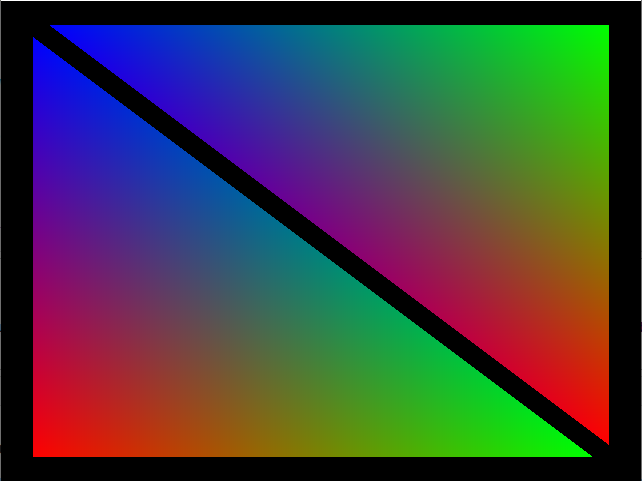

In [3]:
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    def initializeGL(self):
        
        # posição de cada vértice do primeiro triângulos
        vertex_position_01 = np.array([
            -0.90, -0.90, 0.2, 1.0, # Triângulo 1
             0.85, -0.90, 0.2, 1.0,
            -0.90,  0.85, 0.2, 1.0],
            dtype=np.float32)
        
        # posição de cada vértice do segundo triângulos
        vertex_position_02 = np.array([
             0.90, -0.85, 0.0, 1.0, # Triângulo 2
             0.90,  0.90, 0.0, 1.0,
            -0.85,  0.90, 0.0, 1.0],
            dtype=np.float32)
        
        # cria para cada triângulo um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer01 = ModelRenderer(vertex_position_01)
        self.triangleRenderer02 = ModelRenderer(vertex_position_02)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()
        
        # ativa o shader programa para permitir configurar uma cor única para todos os vértices
        self.shaderProgram.bind()
        self.shaderProgram.useUniformColor(True)
        self.shaderProgram.release()

        # recupera o endereços da variável de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer01.setVertexPositionLoc(position_loc)
        self.triangleRenderer02.setVertexPositionLoc(position_loc)

    def paintGL(self):
        
        # configura a cor de background
        gl.glClearColor(0, 0, 0, 1)
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # configura a cor do primeiro triângulo
        self.shaderProgram.setUniformColor(np.array([0.0, 0.0, 0.5, 1.0], dtype=np.float32))
        
        # renderiza o primeiro triângulo
        self.triangleRenderer01.render()
        
        #configura a cor do segundo triângulo
        self.shaderProgram.setUniformColor(np.array([0.5, 0.0, 0.0, 1.0], dtype=np.float32))
        
        # renderiza o segundo triângulo
        self.triangleRenderer02.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('OpenGL example')
    w.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

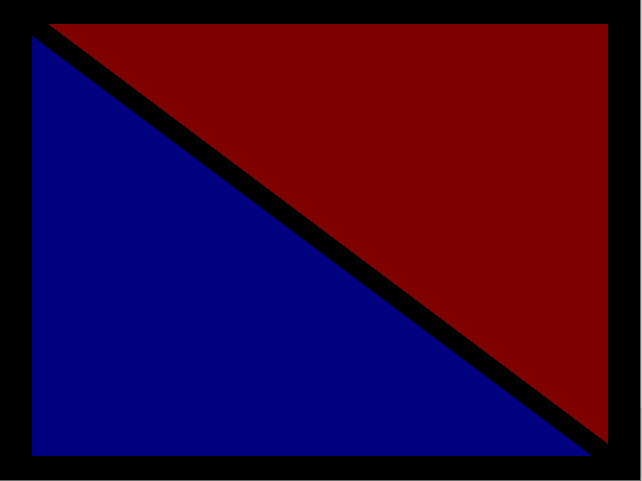

In [4]:
import numpy as np
import OpenGL.GL as gl
from PyQt5 import QtOpenGL
from PyQt5.QtWidgets import QApplication

from cg.shader_programs.SimpleShaderProgram_v1 import SimpleShaderProgram
from cg.renderers.ModelRenderer_v1 import ModelRenderer

class MyWidget(QtOpenGL.QGLWidget):
    def initializeGL(self):
        
        # posição de cada vértice dos triângulos
        vertex_position = np.array([
            -0.90, -0.90, 0.0, 1.0, # Triângulo 1
             0.85, -0.90, 0.0, 1.0,
            -0.90,  0.85, 0.0, 1.0,
             0.90, -0.85, 0.0, 1.0, # Triângulo 2
             0.90,  0.90, 0.0, 1.0,
            -0.85,  0.90, 0.0, 1.0],
            dtype=np.float32)
        
        # cria um objeto responsável por carregar os dados para a GPU e renderizá-los
        self.triangleRenderer = ModelRenderer(vertex_position)
        
        # cria um shader program simples
        self.shaderProgram = SimpleShaderProgram()
        
        # ativa o shader programa para configurar uma cor única para todos os vértices
        self.shaderProgram.bind()
        self.shaderProgram.useUniformColor(True)
        self.shaderProgram.setUniformColor(np.array([0.0, 0.0, 0.5, 1.0], dtype=np.float32))
        self.shaderProgram.release()

        # recupera o endereços da variável de entrada do shader program
        position_loc = self.shaderProgram.getVertexPositionLoc()
        
        # configura os dados do modelo para serem os dados de entrada do shader program
        self.triangleRenderer.setVertexPositionLoc(position_loc)

    def paintGL(self):
        # configura a cor de background
        gl.glClearColor(0, 0, 0, 1)
        
        # limpa o background com a cor especificada
        gl.glClear(gl.GL_COLOR_BUFFER_BIT)
        
        # ativa o shader program que será executado pela GPU
        self.shaderProgram.bind()
        
        # inicia a renderização dos triângulos
        self.triangleRenderer.render()
        
        # desativa o shader program
        self.shaderProgram.release()
        
        # solicita que o método paintGL seja chamado novamente
        self.update()

    def resizeGL(self, width, height):
        
        # atualiza a área de renderização para ser a janela inteira
        gl.glViewport(0, 0, width, height)

def main():
    import sys

    #Criação de um aplicativo Qt
    app = QApplication(sys.argv)

    #Especificação do contexto OpenGL
    glformat = QtOpenGL.QGLFormat()
    glformat.setVersion(3, 3)
    glformat.setDoubleBuffer(True)
    glformat.setProfile(QtOpenGL.QGLFormat.CoreProfile)
    
    #Criação da janela de renderização
    w = MyWidget(glformat)
    w.resize(640, 480)
    w.setWindowTitle('OpenGL example')
    w.show()
    
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()

SystemExit: 0

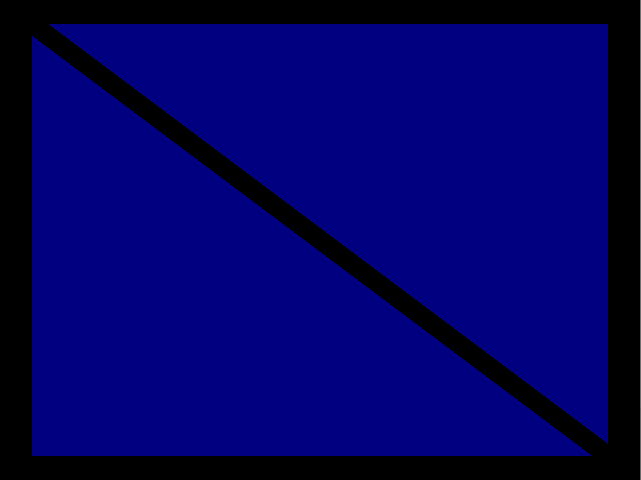

### Parte 2 - Animação

Crie um programa que tenha um objeto (triângulo, quadrado, etc) desenhado no centro, e que as cores deste objeto e do background mudam ao longo do tempo. Você pode usar como base o notebook ([20_Animando_as_cores_dos_triangulos](20_Animando_as_cores_dos_triangulos.ipynb))

### Parte 3 - Evento de teclado

Crie um programa que tenha um objeto (triângulo, quadrado, etc) desenhado e utilize a setas do teclado para deslocar este objeto na janela. O objeto deve se deslocar na direção da teclada pressionada. Você pode usar como base o notebook ([24_Eventos_do_teclado.ipynb](24_Eventos_do_teclado.ipynb))